In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy as sc
import scipy.optimize as sco
import scipy.constants as c
from scipy.optimize import curve_fit as cf
import pandas as pd

In [10]:
#Umrechnung vom Maß [cm] zu Winkel
skala = lambda x: x* 90 / 400

def calcC(n, delta,lambd=589e-9):
    return n*lambd/np.sin(delta*np.pi/180.0)
def calcdC(n,delta, ddelta,lambd=589e-9):
    return n*lambd/np.sin(delta*np.pi/180)**2 * np.cos(delta*np.pi/180) *ddelta*np.pi/180
    
def getColor(c,ordnung,color):
    number=[]
    for i in range(len(c)):
        if c[i] == color:
            number.append(i)
    return number[ordnung]

[ 1.  2.  3.  4.]
[  1.72005893e-06   1.77893189e-06   1.98117222e-06   2.35665414e-06]
[  3.70661975e-08   1.58101940e-08   7.88981637e-09   4.36191548e-10]


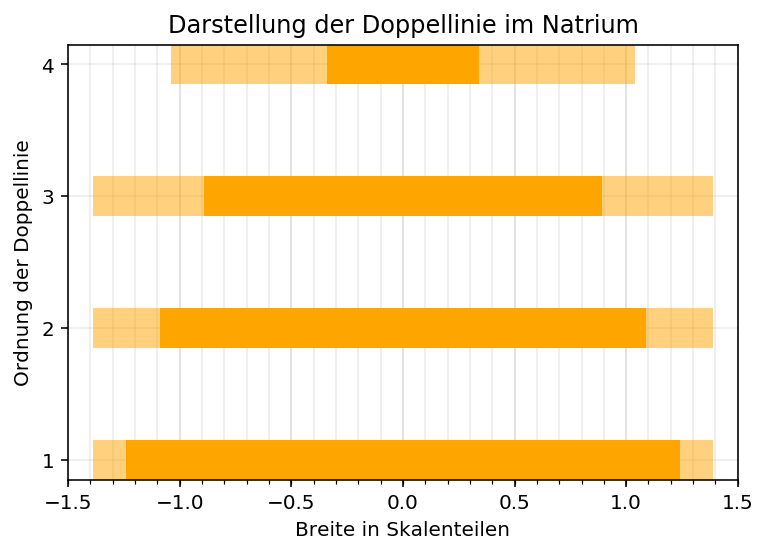

In [11]:
data=[]
data.append( pd.read_csv("Data/Na.txt",delimiter="\t",skiprows=3 ))

n,x,d1,d2,d3=[],[],[],[],[]
for entry in data:
    n= entry.values[:,0]
    x= entry.values[:,1]
    d1=entry.values[:,2]
    d2=entry.values[:,3]
    d3=entry.values[:,4]

deg=skala(x)
alphas=[.5,1,.5]
pos=[.94,.96,.98,1]
fig,ax = plt.subplots(dpi=144)
for i in range(4):
    a=pos[i]
    shift=(d3[i]+d2[i]+d1[i])/2
    # d1 d2 d3
    ax.plot( (-shift ,d1[i]-shift ),(a,a) ,  lw=20,color="orange", alpha= .5)
    ax.plot( (d1[i]-shift ,d2[i]+d1[i]-shift ),(a,a) ,  lw=20,color="orange", alpha= 1)
    ax.plot( (d2[i]+d1[i]-shift ,d3[i]+d2[i]+d1[i]-shift ),(a,a) ,  lw=20,color="orange", alpha= .5)
ns=[int(z) for z in n]
ax.set(yticks=pos,yticklabels=ns, title="Darstellung der Doppellinie im Natrium",
      ylabel="Ordnung der Doppellinie", xlabel="Breite in Skalenteilen")
ax.set_xticks(np.arange(-1.5,1.6,.1),minor=True)
ax.grid(which="both",alpha=.25)

print(n)
print(calcC(n,deg))
print(calcdC(n,deg,[skala(2) for i in deg]))

[1 1 1 1 2 2 2 2 3 3 3 3 4 4 4 4 5 5]
[2.1489675390382704e-06 2.125547792029042e-06 2.091398044639447e-06
 1.5921093923014926e-06 2.2163293075309545e-06 2.1943994914608114e-06
 2.1585513294329735e-06 1.6893212294384915e-06 2.33952409717607e-06
 2.3214245459128244e-06 2.2880819775698117e-06 1.8960676466519444e-06
 2.5530326230899293e-06 2.5407144410173217e-06 2.5159861229471535e-06
 2.385367836356535e-06 2.947050568132887e-06 2.94550168652764e-06]
[4.705512466365023e-08 4.6406405588894024e-08 4.571129209322256e-08
 3.391866365078977e-08 2.204215143462218e-08 2.1715643329549394e-08
 2.1262342279604496e-08 1.4730594958484758e-08 1.2669091887455025e-08
 1.245425662397335e-08 1.207529695824026e-08 6.2591692443944346e-09
 6.6507181995421355e-09 6.457790524026522e-09 6.048352263347017e-09
 -3.2050597091991467e-09 6.864249537783514e-10 3.4234730040101564e-10]


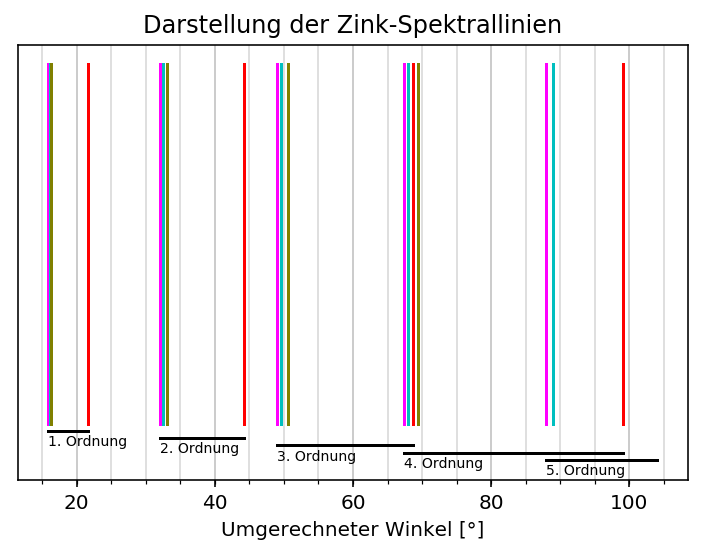

In [28]:
data=[]
data.append( pd.read_csv("Data/Zn.txt",delimiter="\t",skiprows=3 ))

n,x,d=[],[],[]
for entry in data:
    n= entry.values[:,0]
    x= entry.values[:,1]
    c= entry.values[:,2]
    
deg=np.array([skala(i) for i in x]) 

dic = {"violett":"magenta", "blau":"c", "oliv":"olive", "rot":"r",
      "orange":"darkorange", "?":"darkolivegreen", "trkis":"turquoise"}

fig,ax=plt.subplots(dpi=144)
for i in range(len(n)):
    ax.plot( (deg[i],deg[i]), (1,1.5), color=dic[c[i]])
for i in range(5):
    a = deg[getColor(c,i,"violett")]
    if i==4:
        ax.plot( (a , deg[getColor(c,i-1,"rot")]+5 ) , (.99-i*.01,.99-i*.01), color="black" ) 
        ax.text(a , .97-i*.01, "{}. Ordnung".format(i+1), fontsize=7)
        continue
    ax.plot( (a , deg[getColor(c,i,"rot")] ) , (.99-i*.01,.99-i*.01), color="black" ) 
    ax.text(a , .97-i*.01, "{}. Ordnung".format(i+1), fontsize=7)
    
ax.set(yticks=[],xlabel="Umgerechneter Winkel [°]", title="Darstellung der Zink-Spektrallinien")
ax.set_xticks(np.arange(15,106,5),minor=True)
ax.grid(which="both",alpha=.5)

dicWavelens = {"violett":468e-9, "blau":472.2e-9, "oliv":481.1e-9, "rot":636.2e-9}
wavelens= [dicWavelens[i] for i in c]


print(n)
print(calcC(n,deg))
print(calcdC(n,deg,[skala(2) for i in deg],lambd=wavelens))

In [ ]:
data=[]
data.append( pd.read_csv("Data/H-D.txt",delimiter="\t",skiprows=4 ))

x,d1,d2,d3=[],[],[],[]
for entry in data:
    x=  entry.values[:,0]
    d1= entry.values[:,1]
    d2= entry.values[:,2]
    d3= entry.values[:,3]
    
x=skala(x) # Umrechnung in Winkel
# Linienbreite soll Winkelfehler darstellen: dx= 2cm * Umrechnung
lw=skala(20)
# skala(20) stellt gute Grafik dar, jedoch ist dann der Fehler nicht mehr korrekt...

fig,ax = plt.subplots(dpi=144)
for i in range(len(x)):
    ax.plot( (-d2[i]/2-d1[i],d2[i]/2 )  ,(x[i],x[i]) , lw=lw,color="c", alpha= .5)
    ax.plot( (-d2[i]/2,d2[i]/2 )  ,(x[i],x[i]), lw=lw,color="c", alpha= 1)
    ax.plot( (d2[i]/2,d2[i]/2+d3[i])  ,(x[i],x[i]), lw=lw,color="c", alpha= .5)
ax.set(title="Türkise Linien einer Wasserstoff-Deuterium Lampe",
      ylabel="Umgerechneter Winkel [°]", xlabel="Breite in Skalenteilen")
ax.set_xticks(np.arange(-1.5,1.6,.1),minor=True)
ax.grid(which="both",alpha=.25)

In [ ]:
data=[]
data.append( pd.read_csv("Data/H.txt",delimiter="\t",skiprows=4 ))

c,x,intens=[],[],[]
for entry in data:
    c= entry.values[1:,0]
    x= entry.values[1:,1]
    intens= entry.values[1:,2]
    
deg=skala(x)

fig,ax=plt.subplots(figsize=(20,4),dpi=144)
for i in range(len(c)):
    ax.plot( (deg[i],deg[i]), (1,1.5), color=dic[c[i]])
for i in range(5):
    b=i
    if i>1:
        b+=1
    a = deg[getColor(c,b,"violett")]
    ax.plot( (a , deg[getColor(c,i,"rot")] ) , (.99-i*.01,.99-i*.01), color="black" ) 
    ax.text(a , .97-i*.01, "{}. Ordnung".format(i+1), fontsize=7)
ax.set(yticks=[],xlabel="Umgerechneter Winkel [°]", 
       title="Darstellung der Spektrallinien der Wasserstofflampe")
ax.set_xticks(np.arange(10,166,5),minor=True)
ax.grid(which="both",alpha=.5)

#Alter iwas geht da mit den ORdnungen hat in den A****